## Electric Vehicle Project

In [459]:
#pip install --upgrade plotly

In [460]:
#!pip install plotly

In [461]:
#!pip install seaborn

In [679]:
#!pip install geopandas

In [715]:
#!pip install folium

In [462]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [463]:
df = pd.read_csv("/Users/sravankumar/Downloads/Electric_Vehicle_Population_Data.csv")

In [464]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [466]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [467]:
df = df.rename(columns={"Clean Alternative Fuel Vehicle (CAFV) Eligibility": "CAFV"})

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             150482 non-null  object 
 1   County                 150479 non-null  object 
 2   City                   150479 non-null  object 
 3   State                  150482 non-null  object 
 4   Postal Code            150479 non-null  float64
 5   Model Year             150482 non-null  int64  
 6   Make                   150482 non-null  object 
 7   Model                  150482 non-null  object 
 8   Electric Vehicle Type  150482 non-null  object 
 9   CAFV                   150482 non-null  object 
 10  Electric Range         150482 non-null  int64  
 11  Base MSRP              150482 non-null  int64  
 12  Legislative District   150141 non-null  float64
 13  DOL Vehicle ID         150482 non-null  int64  
 14  Vehicle Location       150475 non-nu

In [469]:
df['CAFV'].value_counts()

CAFV
Eligibility unknown as battery range has not been researched    69698
Clean Alternative Fuel Vehicle Eligible                         62951
Not eligible due to low battery range                           17833
Name: count, dtype: int64

In [470]:
df['Model Year'].value_counts() # eash year the customers buying electric velchile is growing

Model Year
2023    37079
2022    27799
2021    18684
2018    14441
2020    11294
2019    10717
2017     8574
2016     5650
2015     4934
2013     4566
2014     3613
2012     1633
2011      796
2024      642
2010       24
2008       19
2000        8
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64

In [471]:
df['Make'].value_counts() # Tesla is the lead in manufacturing the EV vechiles 

Make
TESLA                   68983
NISSAN                  13497
CHEVROLET               12026
FORD                     7614
BMW                      6439
KIA                      6198
TOYOTA                   5223
VOLKSWAGEN               4074
VOLVO                    3536
JEEP                     3292
HYUNDAI                  3171
AUDI                     3006
CHRYSLER                 2642
RIVIAN                   2483
MERCEDES-BENZ            1054
PORSCHE                  1028
MITSUBISHI                849
HONDA                     810
FIAT                      806
MINI                      791
POLESTAR                  764
SUBARU                    623
SMART                     274
LINCOLN                   229
JAGUAR                    228
LUCID                     190
CADILLAC                  176
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 47
FISKER                     17
ALFA ROMEO                 12
AZURE

In [472]:
df['Electric Vehicle Type'].value_counts() #Bev Type of vechiles are more 

Electric Vehicle Type
Battery Electric Vehicle (BEV)            116807
Plug-in Hybrid Electric Vehicle (PHEV)     33675
Name: count, dtype: int64

In [473]:
df.shape

(150482, 17)

## Missing Values 

In [475]:
df.isna().sum()

VIN (1-10)                 0
County                     3
City                       3
State                      0
Postal Code                3
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV                       0
Electric Range             0
Base MSRP                  0
Legislative District     341
DOL Vehicle ID             0
Vehicle Location           7
Electric Utility           3
2020 Census Tract          3
dtype: int64

I could see that Legislative District,2020 Census Tract,Electric Utility,Base MSRP has the alot of missing values, as we are not using in our part of data analyis, I dropping the column as it has no impact for futher analysis

In [477]:
df.drop(['Legislative District','2020 Census Tract','Electric Utility','Base MSRP'],axis=1,inplace=True)

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             150482 non-null  object 
 1   County                 150479 non-null  object 
 2   City                   150479 non-null  object 
 3   State                  150482 non-null  object 
 4   Postal Code            150479 non-null  float64
 5   Model Year             150482 non-null  int64  
 6   Make                   150482 non-null  object 
 7   Model                  150482 non-null  object 
 8   Electric Vehicle Type  150482 non-null  object 
 9   CAFV                   150482 non-null  object 
 10  Electric Range         150482 non-null  int64  
 11  DOL Vehicle ID         150482 non-null  int64  
 12  Vehicle Location       150475 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 14.9+ MB


In [479]:
df[df['County'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,DOL Vehicle ID,Vehicle Location
133103,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,143609049,NaN
136622,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,475254825,NaN
140136,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,112277063,NaN


In [480]:
df.isna().sum()

VIN (1-10)               0
County                   3
City                     3
State                    0
Postal Code              3
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
DOL Vehicle ID           0
Vehicle Location         7
dtype: int64

As we cloud see that there only few missing data points I am dropping them

In [482]:
df.shape

(150482, 13)

In [483]:
df = df.dropna()

In [484]:
df.isna().sum()

VIN (1-10)               0
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
DOL Vehicle ID           0
Vehicle Location         0
dtype: int64

In [485]:
df.shape

(150475, 13)

## Understanding the Data

In [487]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,DOL Vehicle ID,Vehicle Location
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,249675142,POINT (-122.34301 47.659185)
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,233928502,POINT (-122.20578 47.762405)
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,229675939,POINT (-120.6027202 46.5965625)
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,104714466,POINT (-122.209285 47.71124)
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,185498386,POINT (-122.89692 47.043535)


/var/folders/52/dpyrwsds1pz9cf4q4vkb6pl00000gn/T/ipykernel_8551/2620041860.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




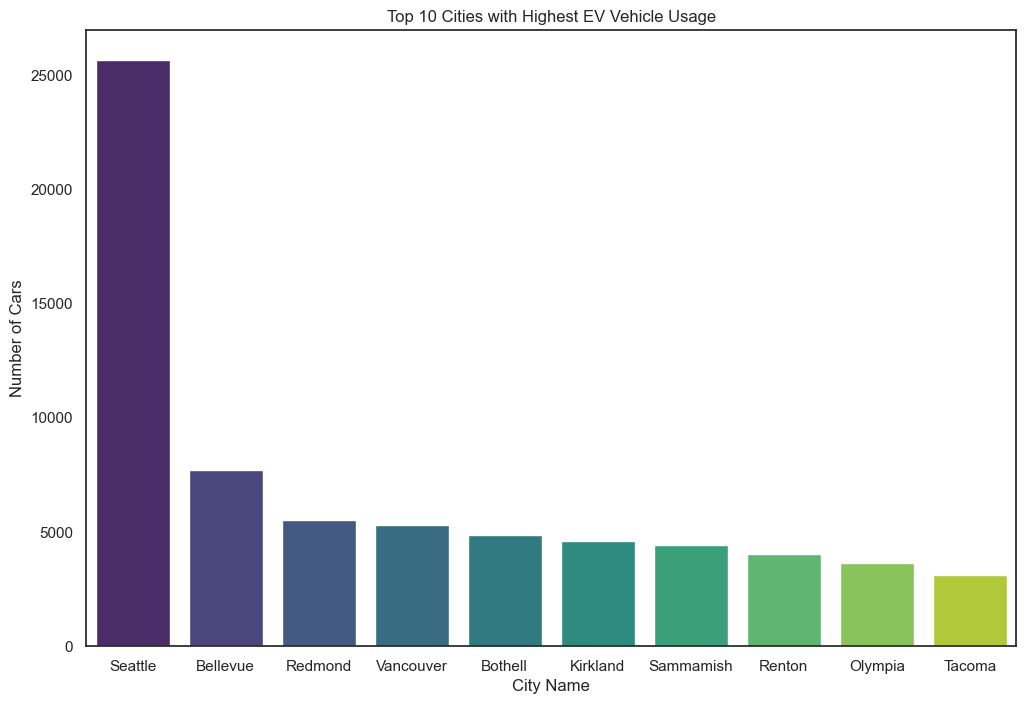

In [488]:
#Now checking what are top cities where EV Vehicle useage is high
city_counts = df.groupby('City').count().sort_values(by='County', ascending=False)['County']

top_cities = city_counts.head(10)


plt.figure(figsize=(12, 8))
sns.set_theme(style="white")  
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")

plt.title("Top 10 Cities with Highest EV Vehicle Usage")
plt.xlabel("City Name")
plt.ylabel("Number of Cars")

plt.show()

In [489]:
city_counts.head(10)

City
Seattle      25675
Bellevue      7691
Redmond       5502
Vancouver     5310
Bothell       4861
Kirkland      4622
Sammamish     4436
Renton        4043
Olympia       3634
Tacoma        3121
Name: County, dtype: int64

/var/folders/52/dpyrwsds1pz9cf4q4vkb6pl00000gn/T/ipykernel_8551/2533903358.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




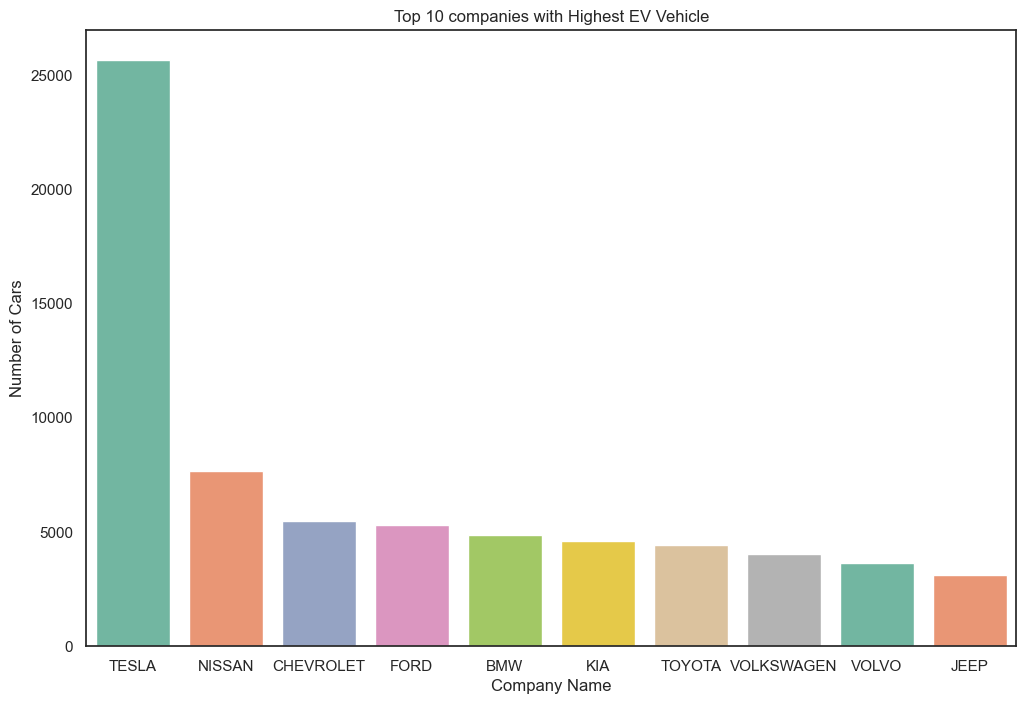

In [490]:
#Now checking what are top companies where EV Vehicle production is high
companies_counts = df.groupby('Make').count().sort_values(by='County', ascending=False)['County']

top_companies = companies_counts.head(10)


plt.figure(figsize=(12, 8))

sns.barplot(x=top_companies.index, y=top_cities.values, palette="Set2")

plt.title("Top 10 companies with Highest EV Vehicle")
plt.xlabel("Company Name")
plt.ylabel("Number of Cars")

plt.show()

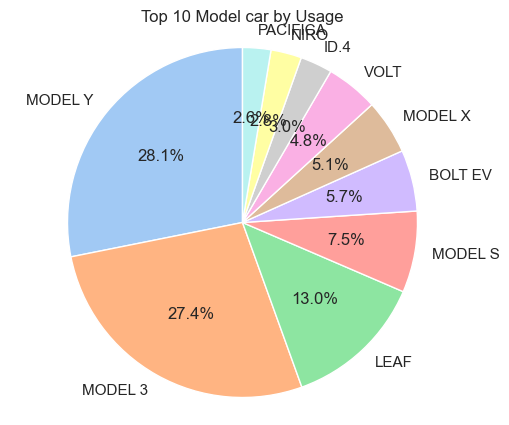

In [491]:
#Top 10 model Car by usages

Models = df.groupby('Model').count().sort_values(by='Make',ascending=False)['Make'].index[:10]
values = df.groupby('Model').count().sort_values(by='Make',ascending=False)['Make'].values[:10]
sns.set_theme(style="white")  
plt.figure(figsize=(6, 5))  
plt.pie(values, labels=Models, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel')[:10])
plt.axis('equal')  
plt.title("Top 10 Model car by Usage")
plt.show()

In [492]:
companies = df.groupby('Make').count().sort_values(by="City",ascending=False)['City'].index[:10]

for i in companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is -->',data[0])

Top selling model for TESLA is --> MODEL Y
Top selling model for NISSAN is --> LEAF
Top selling model for CHEVROLET is --> BOLT EV
Top selling model for FORD is --> MUSTANG MACH-E
Top selling model for BMW is --> X5
Top selling model for KIA is --> NIRO
Top selling model for TOYOTA is --> PRIUS PRIME
Top selling model for VOLKSWAGEN is --> ID.4
Top selling model for VOLVO is --> XC90
Top selling model for JEEP is --> WRANGLER


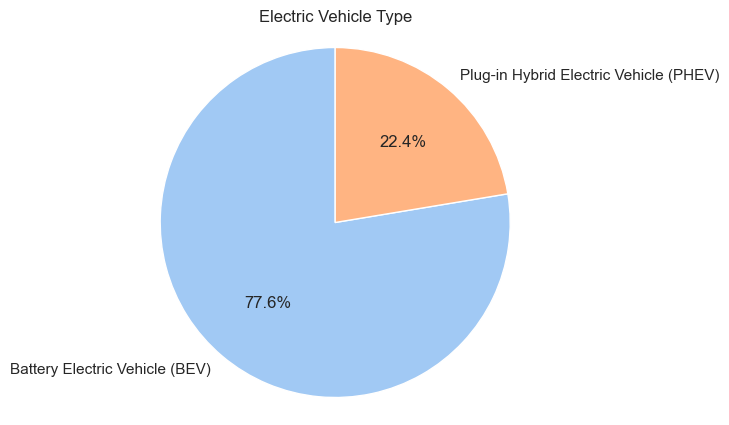

In [493]:
type = df.groupby('Electric Vehicle Type').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Electric Vehicle Type').count().sort_values(by='City',ascending=False)['City'].values
sns.set_theme(style="white")  
plt.figure(figsize=(6, 5))  
plt.pie(values, labels=type, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.axis('equal')  
plt.title("Electric Vehicle Type")
plt.show()

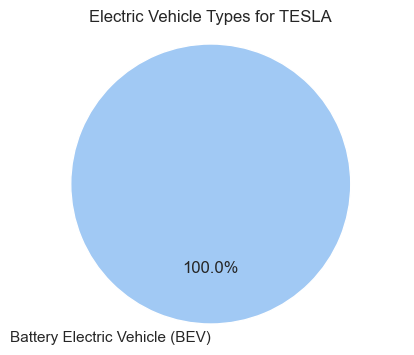

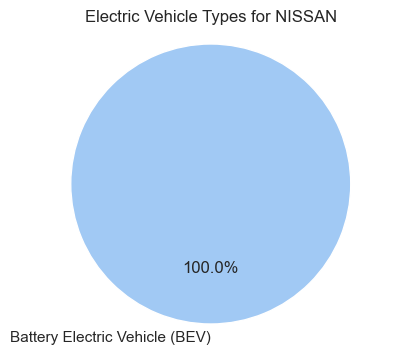

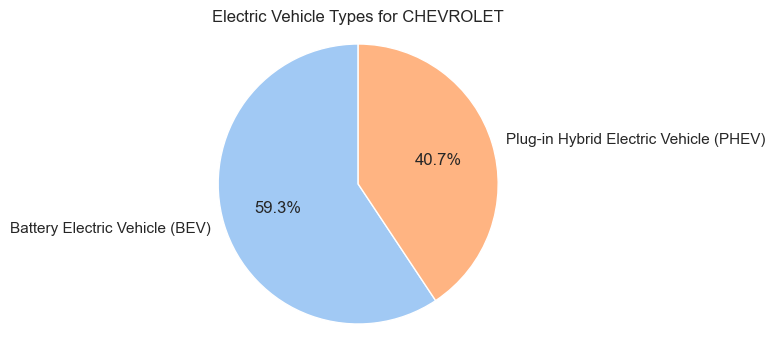

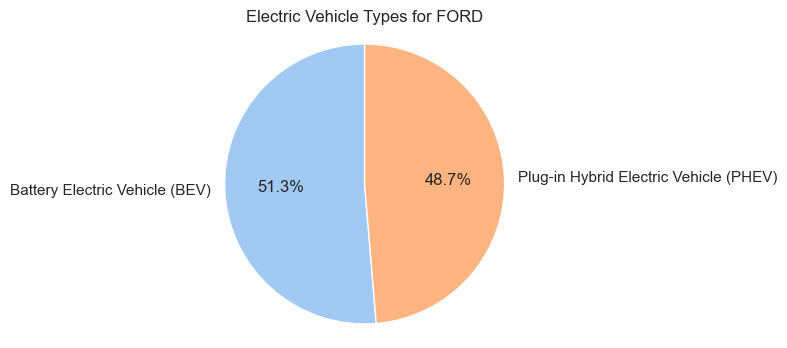

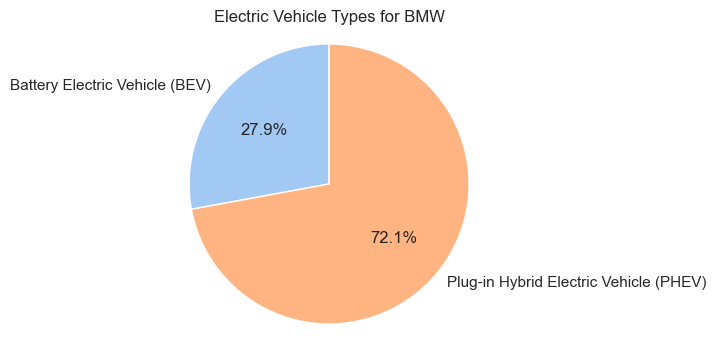

In [546]:
companies = df.groupby('Make').count().sort_values(by="City",ascending=False)['City'].index[:5]
sns.set_theme(style="white")  
for index, i in enumerate(companies):
    
    data = df[df['Make'] == i]
    
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    
    plt.figure(figsize=(5, 4))
    
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
    
    plt.title(f"Electric Vehicle Types for {i}")
    plt.axis('equal')  
    plt.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

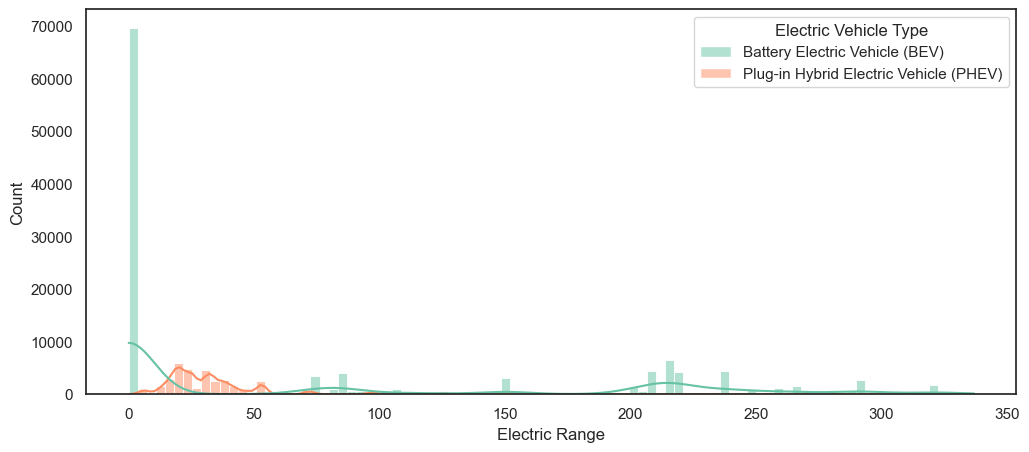

In [552]:
plt.figure(figsize=(12,5))
sns.set_style(style='white')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

/var/folders/52/dpyrwsds1pz9cf4q4vkb6pl00000gn/T/ipykernel_8551/3325455446.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

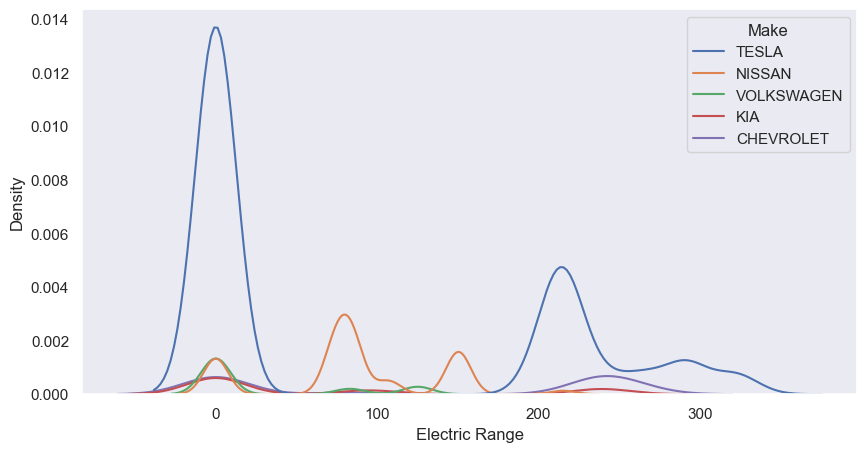

In [577]:
#bev 

bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
bev['bev'] = bev['Make'].apply(lambda x:1 if x in companies else 0 )
bev = bev[bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=bev)

if we remove zero ranges we can see TESLA and Nissan offering high range of miles 

Tesla has the Highest range 

/var/folders/52/dpyrwsds1pz9cf4q4vkb6pl00000gn/T/ipykernel_8551/4075913406.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

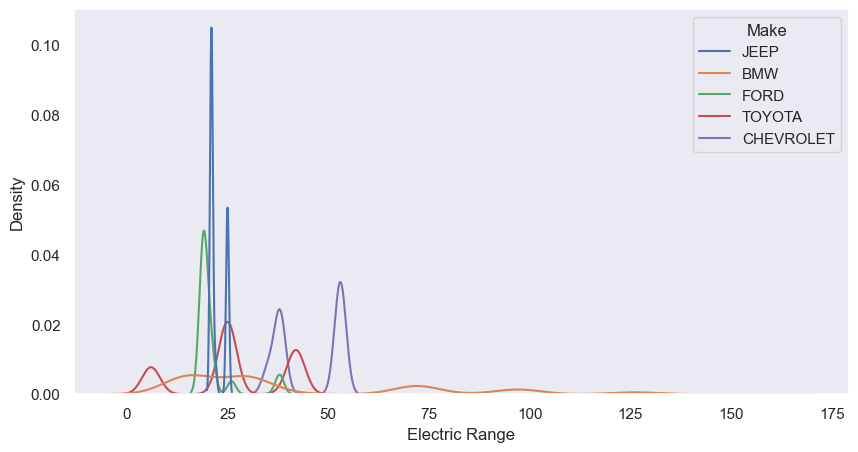

In [602]:
#phev

bev = df[df['Electric Vehicle Type'] =='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
bev['phev'] = bev['Make'].apply(lambda x:1 if x in companies else 0 )
bev = bev[bev['phev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=bev)

if we remove zero ranges we can see BMW and CHEVROLET offering high range of miles 

In [611]:
df['Vehicle Location'].head()

0       POINT (-122.34301 47.659185)
1       POINT (-122.20578 47.762405)
2    POINT (-120.6027202 46.5965625)
3       POINT (-122.209285 47.71124)
4       POINT (-122.89692 47.043535)
Name: Vehicle Location, dtype: object

In [621]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

In [623]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,DOL Vehicle ID,Vehicle Location,Lattitude,Longitude
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,249675142,POINT (-122.34301 47.659185),-122.343010,47.659185
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,233928502,POINT (-122.20578 47.762405),-122.205780,47.762405
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,229675939,POINT (-120.6027202 46.5965625),-120.602720,46.596562
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,104714466,POINT (-122.209285 47.71124),-122.209285,47.711240
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,185498386,POINT (-122.89692 47.043535),-122.896920,47.043535


(20.0, 50.0)

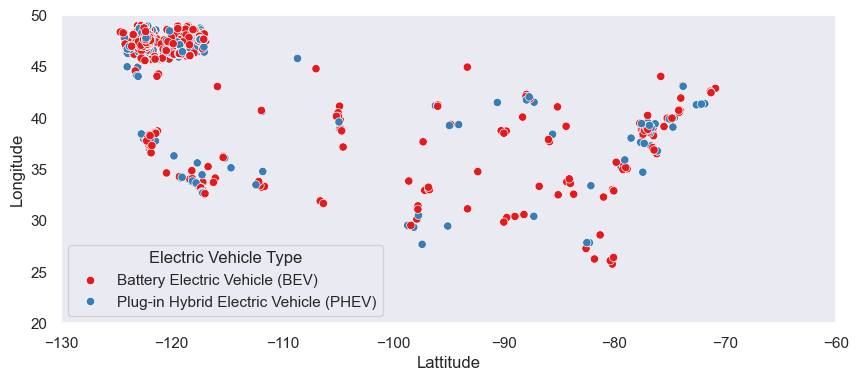

In [627]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

(20.0, 50.0)

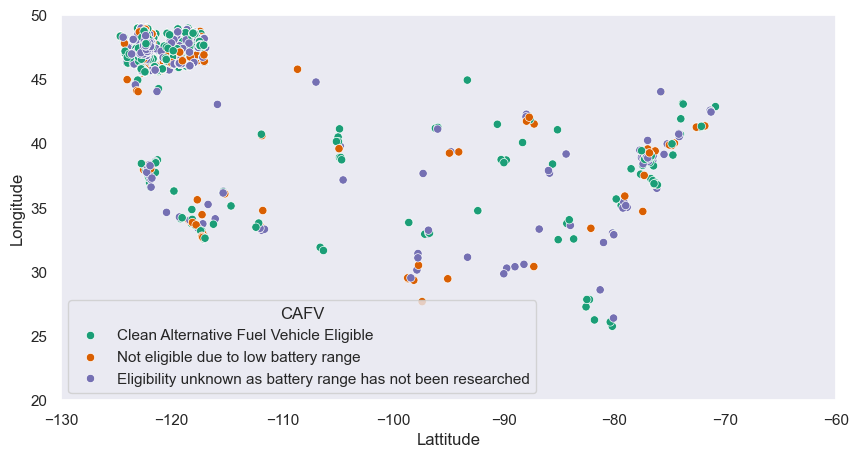

In [667]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='CAFV',palette='Dark2')
plt.xlim(-130,-60) #latitude are mostly in this range 
plt.ylim(20,50) #longitude are mostly in this range

In [738]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])
data = data.reset_index()
data.columns = ['State','Count']

In [734]:
import folium
import pandas as pd

geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

m = folium.Map(location=[37.8, -96], zoom_start=4)

folium.Choropleth(
    geo_data=geojson_url,
    name="choropleth",
    data=data,
    columns=["State", "Count"],
    key_on="feature.id",  
    fill_color="YlGn",  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Count per State",
).add_to(m)

folium.LayerControl().add_to(m)

m